## **INSTALLATION**

In [ ]:
# !pip install tensorflow

     |████████████████████████████████| 462 kB 4.1 MB/s 


In [ ]:
# !pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 


## **Mounting Drive and Checking Images**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import applications
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

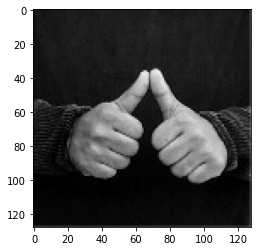

In [19]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/ISL/DataSet"
CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break
  break

In [20]:
def simple_vision(img):
    Picking_Img = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
    
    return Picking_Img
def threshold_vision(img):
    Picking_Img = simple_vision(img)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img
def canny_vision(img):
    Threshold_Img = threshold_vision(img)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img
def func1(path):    
    frame = cv2.imread(str(path))
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res
def func(path):
    path = path.astype('uint8').reshape(70, 70)  
    # path = path.astype('uint8').reshape(70, 70) 
    # frame = cv2.imread(str(path))
    
    # gray = cv2.cvtColor(path, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(path,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    res = res/255
    return res.reshape(70, 70, 1)

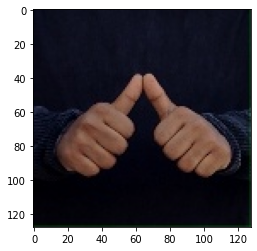

In [ ]:
processed_image = simple_vision(os.path.join(path, '100.jpg'))
plt.imshow(processed_image, cmap = 'gray')

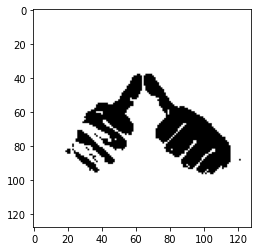

In [ ]:
processed_image = threshold_vision(os.path.join(path, '100.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

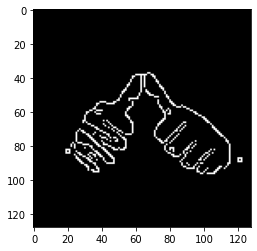

In [ ]:
processed_image = canny_vision(os.path.join(path, '100.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

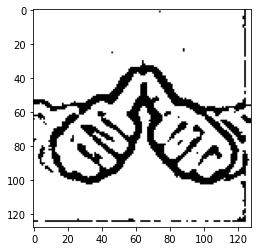

In [ ]:
processed_image = func1(os.path.join(path, '100.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

## **Creating split in our data**

In [21]:
image_generator = ImageDataGenerator(
                                  #  rescale=1/255, 
                                   validation_split=0.2,
                                   rotation_range=17,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                  #  horizontal_flip=True,
                                   preprocessing_function = func
                                   )    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                #  shuffle=True,
                                                 target_size=(70, 70), 
                                                 color_mode = "grayscale",
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                #  shuffle=True,
                                                 target_size=(70, 70), 
                                                 color_mode = "grayscale",
                                                 subset="validation",
                                                 class_mode='categorical')

Found 24984 images belonging to 26 classes.
Found 6246 images belonging to 26 classes.


In [22]:
len(train_dataset)

781

In [23]:
len(validation_dataset)

196

In [24]:
train_dataset.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [25]:
train_dataset.image_shape

(70, 70, 1)

In [26]:
train_dataset.classes[0:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [27]:
validation_dataset.image_shape

(70, 70, 1)

In [28]:
validation_dataset.classes[0:5]

array([0, 0, 0, 0, 0], dtype=int32)

## **Creating Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout, LeakyReLU, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (70, 70, 1)),
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),                                                #layer1
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding="same"),
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),                                                #layer2
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding="same"),
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),                                                #layer3
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),                                                    #layer4
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),                                                    #layer5
                                    tf.keras.layers.Dropout(0.25),

                                    # tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    # # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.MaxPool2D(2,2),                                                    #layer6
                                    # tf.keras.layers.Dropout(0.5), 

                                    # tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    # # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.MaxPool2D(2,2),                                                    #layer7
                                    # tf.keras.layers.Dropout(0.5),

                                    # tf.keras.layers.GlobalAveragePooling2D(),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),                                        #layer8
                                    # tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(26, activation = 'softmax')                                      #layer9
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 34, 34, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 17, 17, 64)        0

## **Training The Model**

*   batch_size = 32
*   train_dataset = 781
*   validation_dataset = 196
*   train_size = 24984
*   validation_seize = 6246

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(),
              metrics = ["accuracy"])

In [29]:
batch_size=32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_dataset,
    epochs = 15,
    steps_per_epoch = len(train_dataset) // batch_size,
    validation_data = validation_dataset,
    validation_steps = len(validation_dataset) // batch_size,
    # callbacks = callback
)

Epoch 1/15
24/24 [==============================] - 488s 20s/step - loss: 3.2717 - accuracy: 0.0417 - val_loss: 3.2571 - val_accuracy: 0.0365
Epoch 2/15
24/24 [==============================] - 469s 20s/step - loss: 3.2612 - accuracy: 0.0365 - val_loss: 3.2574 - val_accuracy: 0.0573
Epoch 3/15
24/24 [==============================] - 451s 19s/step - loss: 3.2598 - accuracy: 0.0365 - val_loss: 3.2578 - val_accuracy: 0.0521
Epoch 4/15
 9/24 [==========>...................] - ETA: 3:39 - loss: 3.2581 - accuracy: 0.0347

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_7MXRL.h5")

## **Loading and Plotting the model**

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_4.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd

Text(0.5, 0, '7MXRL')

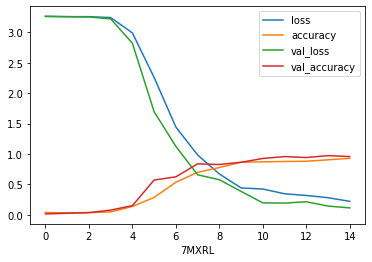

In [ ]:
Grap_Data = pd.DataFrame(history.history)
Grap_Data.plot()
plt.xlabel("7MXRL")

No handles with labels found to put in legend.


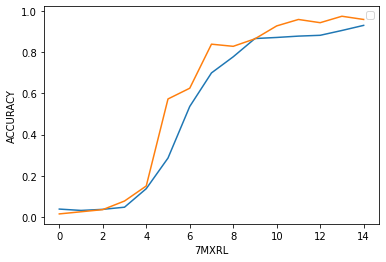

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.xlabel("7MXRL")
plt.legend()
plt.show()

No handles with labels found to put in legend.


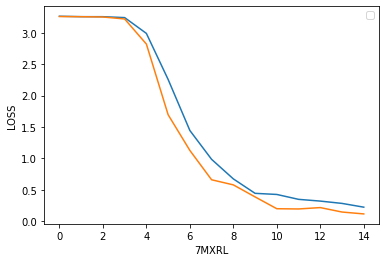

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("LOSS")
plt.xlabel("7MXRL")
plt.legend()
plt.show()

In [ ]:
Y_pred = model.predict(validation_dataset, len(validation_dataset) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_dataset.classes, y_pred))
print('Classification Report')
target_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
print(classification_report(validation_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 9  7  9  7 10 10  4  4  8 15 11 14  8  9  8 10  8 12 12  7 11 11 10 14
   6  6]
 [ 7  4  8  8  8  6  8 10  8 11  9 15 10  6 14 12  3  7 11 16  5 10  6 11
  17 10]
 [15  8  9 10  5 10  5 12 11  7 11  4 12  9  9  8  9 11 10  6 15  8 13  7
  11  7]
 [10  6 13 10  4 14  9  5 13 14  8 11 11 13 10  5  7 11  9  7  8  8 12  7
  10  5]
 [ 5  6  9  5  9  8 11  7 11 11  4  7 12  9 12 13 14  9 15  7 16 12  4 12
   8  4]
 [ 7 10  6 13  9 14 10  8 10  7  6 11  6  5 13  9  7 14  5  9 12  7 10 13
   6 13]
 [10  9 12  9 10 10  9  7  8  5 12  8 13  7 10  6  9 15  8  7  7  9 10  7
  13 12]
 [ 4 12  5  6 11  8  6  3  9  8 14  9 10  8  8 10  9 18 12  8 12 11 12  7
  10 12]
 [ 9 11  9  9  6 11  9  3 10 17 12  6 12 11  7  7 10  7 11  5 10  9 10 11
   8 10]
 [13  9 13  6  6  7 11  5  9  3 11 11 10  9 14 10 10 12  9 11  9 12  6 10
   9  5]
 [ 9  9  7  8 10  7 10  9 10 12 13  8  9  6 10  6  9 11 14 12  5  8  8  9
   9 12]
 [ 6 11 10  8 11 12  9  7 11  8  7 13  6 12  9 13  6 11  7  5 10  7 10

In [ ]:
print(Y_pred)

[[2.35502818e-03 1.77657104e-03 6.49755566e-06 ... 9.70423222e-01
  2.35354737e-03 4.16059949e-04]
 [1.58820697e-07 3.35291929e-07 7.36708389e-05 ... 3.35853747e-06
  9.42705583e-07 2.45621559e-05]
 [1.26788224e-08 1.76751871e-06 2.32307316e-12 ... 1.01398228e-07
  2.07022566e-10 3.76822532e-12]
 ...
 [1.03654098e-02 1.04773266e-03 7.09431843e-05 ... 7.82483399e-01
  1.94799481e-03 1.40843715e-03]
 [2.78777379e-09 3.29182512e-05 2.20728538e-08 ... 1.82740408e-07
  7.39748574e-09 2.65359166e-08]
 [8.76796985e-05 1.47052226e-03 1.10548484e-04 ... 4.17426880e-03
  4.74449553e-06 2.42745783e-03]]


In [ ]:
print(validation_dataset.classes)

[ 0  0  0 ... 25 25 25]


In [ ]:
print(y_pred)

[23 14 17 ... 23  9 13]


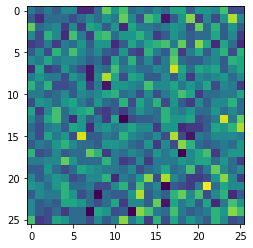

In [ ]:
plt.imshow(confusion_matrix(validation_dataset.classes, y_pred))

In [ ]:
import seaborn as sn
import pandas as pd
array = confusion_matrix(validation_dataset.classes, y_pred)

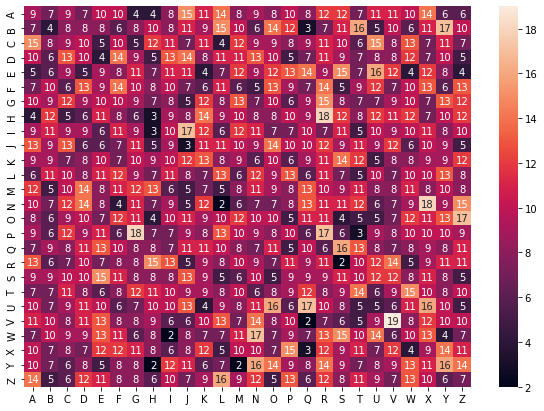

In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## **View of model summary**

In [52]:
from tensorflow.keras.models import load_model
classifier1 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/7/ISL_CNN_7MXRL.h5")
# classifier2 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5MXLR.h5")
# classifier3 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5MXEL.h5")
# classifier4 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/9/ISL_CNN_9GARL.h5")
# classifier5 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5GALR.h5")
# classifier6 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5GAEL.h5")
# classifier7 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/9/ISL_CNN_9AVRL.h5")
# classifier8 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5AVLR.h5")
# classifier9 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/5/ISL_CNN_5AVEL.h5")

In [31]:
# classifier1.summary()

In [32]:
# classifier2.summary()

In [33]:
# classifier3.summary()

In [34]:
# classifier4.summary()

In [35]:
# classifier5.summary()

In [36]:
# classifier6.summary()

In [37]:
# classifier7.summary()

In [38]:
# classifier8.summary()

In [39]:
# classifier9.summary()

# **TESTING**

In [53]:
CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [54]:
path = "/content/drive/MyDrive/Colab Notebooks/ISL/test/test.jpg"

In [55]:
processed_image = func1(path)
print(processed_image.shape)

(128, 128)


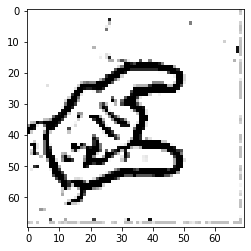

In [56]:
processed_image = cv2.resize(processed_image,(70, 70))
plt.imshow(processed_image, cmap = "gray")

In [57]:
print(processed_image)
# processed_image = cv2.flip(processed_image, 0)
# plt.imshow(processed_image, cmap = "gray")

[[255 255 255 ... 255 193 255]
 [255 255 255 ... 255 208 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 193 255]
 [193 208 255 ... 193 193 255]
 [255 255 255 ... 255 255 255]]


In [58]:
processed_image = processed_image/255
print(processed_image)

[[1.         1.         1.         ... 1.         0.75686275 1.        ]
 [1.         1.         1.         ... 1.         0.81568627 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         0.75686275 1.        ]
 [0.75686275 0.81568627 1.         ... 0.75686275 0.75686275 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [59]:
processed_image = processed_image.reshape(1, 70, 70, 1)
y = str((np.argmax(classifier1.predict(processed_image), axis=-1)))
result = CATEGORIES[int(y[1:len(y)-1])]

In [60]:
print(result)

C


In [61]:
#for batch
preds = []
res = []
for i in CATEGORIES:
  pathn = "/content/drive/MyDrive/Colab Notebooks/ISL/test/test"+i+".jpg"
  processed_image = func1(pathn)
  processed_image = cv2.resize(processed_image,(70, 70))
  # plt.imshow(processed_image, cmap = "gray")
  processed_image = processed_image/255
  processed_image = processed_image.reshape(1, 70, 70, 1)
  y = str((np.argmax(classifier1.predict(processed_image), axis=1)))
  result = CATEGORIES[int(y[1:len(y)-1])]
  preds.append(result)
  res.append(i)
  print("Predicted = " + result + ", Real = " + i + " " + pathn)

Predicted = A, Real = A /content/drive/MyDrive/Colab Notebooks/ISL/test/testA.jpg
Predicted = N, Real = B /content/drive/MyDrive/Colab Notebooks/ISL/test/testB.jpg
Predicted = C, Real = C /content/drive/MyDrive/Colab Notebooks/ISL/test/testC.jpg
Predicted = D, Real = D /content/drive/MyDrive/Colab Notebooks/ISL/test/testD.jpg
Predicted = E, Real = E /content/drive/MyDrive/Colab Notebooks/ISL/test/testE.jpg
Predicted = F, Real = F /content/drive/MyDrive/Colab Notebooks/ISL/test/testF.jpg
Predicted = O, Real = G /content/drive/MyDrive/Colab Notebooks/ISL/test/testG.jpg
Predicted = H, Real = H /content/drive/MyDrive/Colab Notebooks/ISL/test/testH.jpg
Predicted = I, Real = I /content/drive/MyDrive/Colab Notebooks/ISL/test/testI.jpg
Predicted = J, Real = J /content/drive/MyDrive/Colab Notebooks/ISL/test/testJ.jpg
Predicted = K, Real = K /content/drive/MyDrive/Colab Notebooks/ISL/test/testK.jpg
Predicted = L, Real = L /content/drive/MyDrive/Colab Notebooks/ISL/test/testL.jpg
Predicted = N, R

In [62]:
print(preds)

['A', 'N', 'C', 'D', 'E', 'F', 'O', 'H', 'I', 'J', 'K', 'L', 'N', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'S', 'Z']


In [63]:
print(res)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


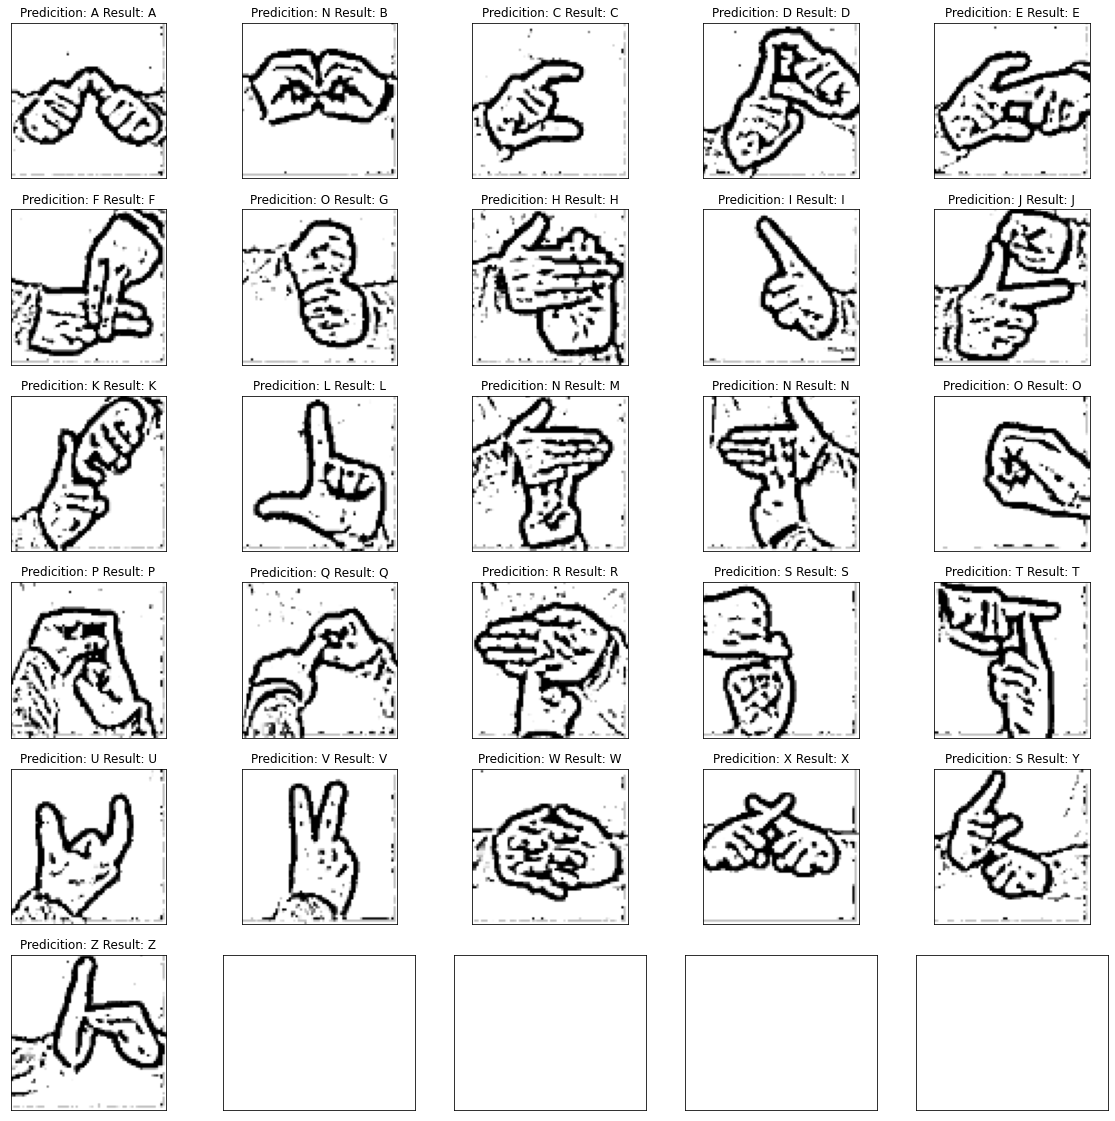

In [64]:
fig, axes = plt.subplots(nrows=6,
                        ncols=5,
                        figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
cnt = 0
for i in range(6):
  for j in range(5):
    if cnt < 26:
      pathn = "/content/drive/MyDrive/Colab Notebooks/ISL/test/test"+CATEGORIES[cnt]+".jpg"
      processed_image = func1(pathn)
      processed_image = cv2.resize(processed_image,(70, 70))
      axes[i, j].imshow(processed_image, cmap = "gray")
      axes[i, j].set_title("Predicition: " + preds[cnt] + " Result: " + res[cnt])
      cnt += 1
    else:
      break